In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Independent and Dependent Variables

In [3]:
X = dataset.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
y = dataset.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### One-Hot Encoding

In [5]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8000, 11) (2000, 11)
(8000,) (2000,)


### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

### ANN

In [9]:
from tensorflow import keras
from keras.models import Sequential  # For doing any Neural Network
from keras.layers import Dense # For making Hidden Layer
from keras.layers import ReLU,LeakyReLU # For Activation Function
from keras.layers import Dropout  # For Regularization Parameter

In [23]:
# Initializing ANN
classifier = Sequential()
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation='sigmoid'))

In [24]:
# Viewing the ANN
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Binary_crossentropy - when your output is 0 or 1.
# Categorical_crossentropy - when yur output is multiple categories.
# Fitting ANN
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
# Batch_size  -  No.of data taken in one go, from the dataset.
# 

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6579 - accuracy: 0.6999 - val_loss: 0.5069 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7796 - val_loss: 0.4807 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5051 - accuracy: 0.7946 - val_loss: 0.4717 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4878 - accuracy: 0.7959 - val_loss: 0.4651 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4803 - accuracy: 0.7962 - val_loss: 0.4593 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4727 - accuracy: 0.7962 - val_loss: 0.4556 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.7962 - val_loss: 0.4529 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.7962 - val_loss: 0.4017 - val_accuracy: 0.7955
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4312 - accuracy: 0.7962 - val_loss: 0.4043 - val_accuracy: 0.7955
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.7962 - val_loss: 0.4035 - val_accuracy: 0.7955
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.7962 - val_loss: 0.3997 - val_accuracy: 0.7955
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4359 - accuracy: 0.7962 - val_loss: 0.4061 - val_accuracy: 0.7955
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.7962 - val_loss: 0.4009 - val_accuracy: 0.7955
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.7962 - val_loss: 0.4013 - val_accuracy:

In [20]:
# Test classifier on Test Data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[1595,    0],
       [ 370,   35]], dtype=int64)

In [22]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.815

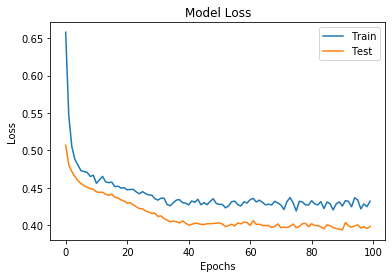

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])
plt.show()